# Stock Data ETL & EDA

The stock_data file stores raw data of 10-years historical stock prices of 25 companies, extracted from [Yahoo Finance](https://finance.yahoo.com/quote/FB/history/). The detailed extraction process can be viewed in app.py. It is live data which updates everyday.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./stock_data.csv')

In [3]:
df.columns =['Date','Stock','High','Low','Open','Close','Volume']

In [4]:
df.shape

(66703, 7)

In [5]:
df.head()

,Date,Stock,High,Low,Open,Close,Volume
0,2011-01-04,AAPL,11.875000,11.719643,11.872857,11.831786,309080800.0
1,2011-01-05,AAPL,11.940714,11.767857,11.769643,11.928571,255519600.0
2,2011-01-06,AAPL,11.973214,11.889286,11.954286,11.918929,300428800.0
3,2011-01-07,AAPL,12.012500,11.853571,11.928214,12.004286,311931200.0
4,2011-01-10,AAPL,12.258214,12.041786,12.101071,12.230357,448560000.0


In [6]:
df.tail()

,Date,Stock,High,Low,Open,Close,Volume
66698,2021-12-07,TXN,199.860001,195.929993,196.399994,199.029999,5815600.0
66699,2021-12-08,TXN,198.500000,193.869995,198.500000,196.389999,4255900.0
66700,2021-12-09,TXN,196.899994,193.250000,195.570007,193.399994,3626700.0
66701,2021-12-10,TXN,196.360001,192.809998,196.020004,196.000000,3264200.0
66702,2021-12-13,TXN,196.740005,192.910004,196.100006,193.240005,6115800.0


In [11]:
df['Stock'].value_counts()

IBM     2756
ADBE    2756
TSLA    2756
QCOM    2756
ORCL    2756
NVDA    2756
NFLX    2756
MSFT    2756
LRCX    2756
INTU    2756
INTC    2756
TXN     2756
GOOG    2756
EBAY    2756
CSCO    2756
CRM     2756
AVGO    2756
AMZN    2756
AMD     2756
AMAT    2756
ADP     2756
AAPL    2755
FB      2409
TWTR    2039
PYPL    1624
Name: Stock, dtype: int64

# Facebook Metrics Data ETL & EDA

The Facebook metrics dataset is downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Facebook+metrics). The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [8]:
df = pd.read_csv('./Facebook_metrics.csv',sep=';')

In [9]:
df.shape

(500, 19)

In [10]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## EDA

### Correlation Matrix

<AxesSubplot:>

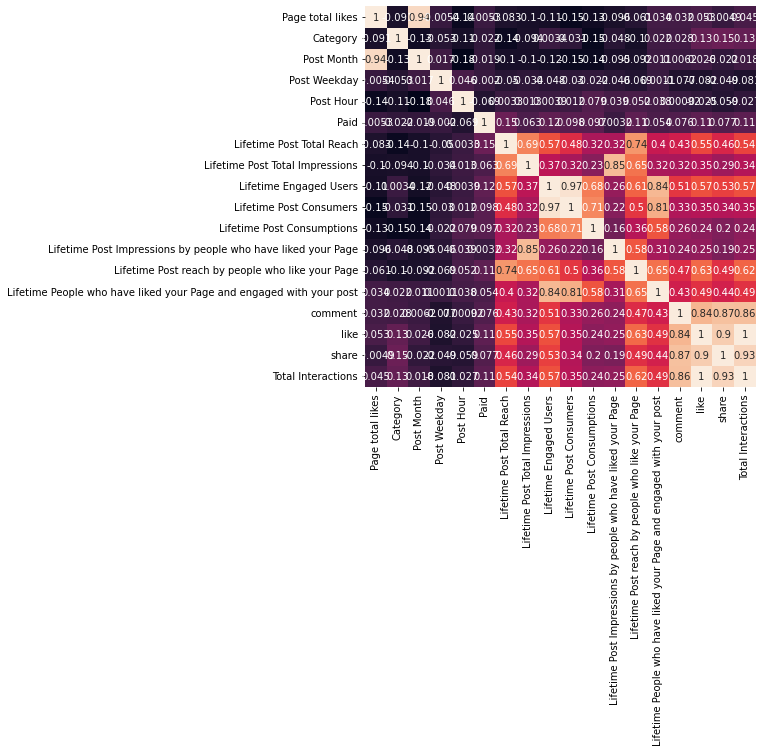

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cbar=False)

### Total Page Likes

In [12]:
df['Page total likes'].describe()

count       500.000000
mean     123194.176000
std       16272.813214
min       81370.000000
25%      112676.000000
50%      129600.000000
75%      136393.000000
max      139441.000000
Name: Page total likes, dtype: float64

Text(0.5, 1.0, 'Page total likes')

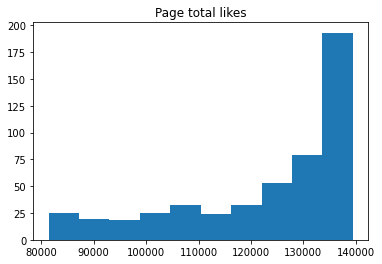

In [27]:
plt.hist(df['Page total likes'])
plt.title('Page total likes')

### Type

In [14]:
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

Text(0.5, 1.0, 'Number of posts for different types of post')

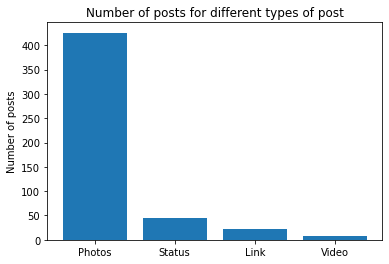

In [15]:
objects = ('Photos', 'Status', 'Link', 'Video')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df['Type'].value_counts().values)
plt.xticks(y_pos, objects)
plt.ylabel('Number of posts')
plt.title('Number of posts for different types of post')

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

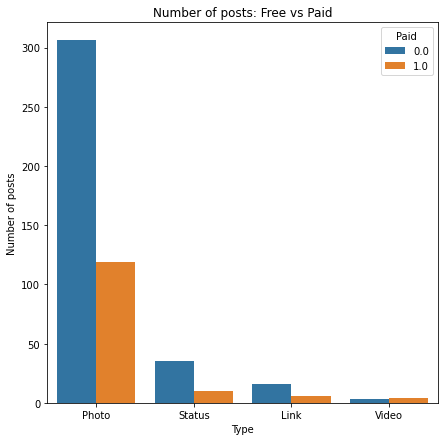

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x='Type',hue='Paid',data=df)
plt.ylabel("Number of posts")
plt.title("Number of posts: Free vs Paid")

### Post Month

Text(0.5, 1.0, 'Number of posts for each month')

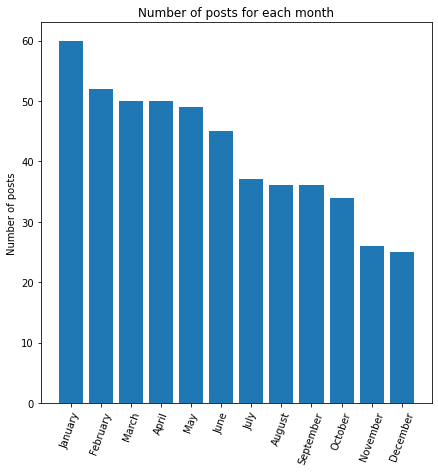

In [28]:
plt.figure(figsize=(7,7))
objects = ('January','February','March','April','May','June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df['Post Month'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each month')

### Post Weekday

Text(0.5, 1.0, 'Number of posts for each weekday')

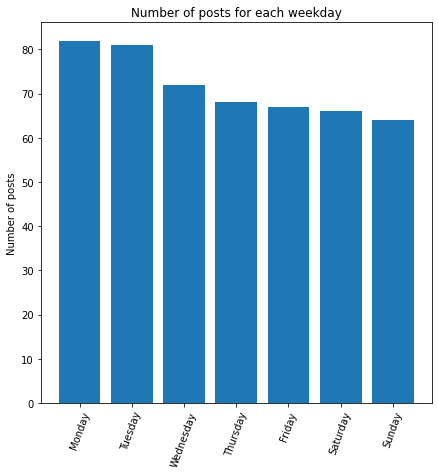

In [30]:
plt.figure(figsize=(7,7))
objects = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df['Post Weekday'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each weekday')

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

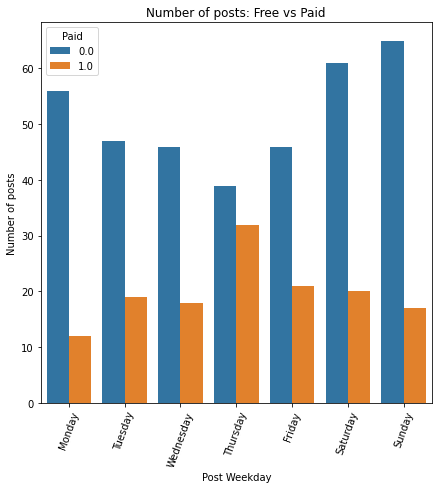

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(x='Post Weekday',hue='Paid',data=df)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title("Number of posts: Free vs Paid")

### Post Hour

In [20]:
a=df['Post Hour'].value_counts().values
a=np.insert(a, 20, 0)
a=np.insert(a, 0, 0)

Text(0.5, 1.0, 'Number of posts for each hour of the day')

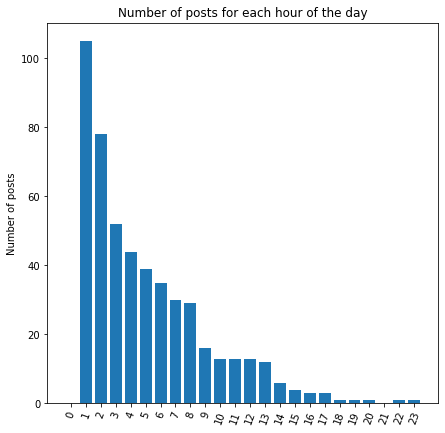

In [21]:
plt.figure(figsize=(7,7))
objects = (np.arange(24))
y_pos = np.arange(len(objects))
plt.bar(y_pos, a)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each hour of the day')

### Paid

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

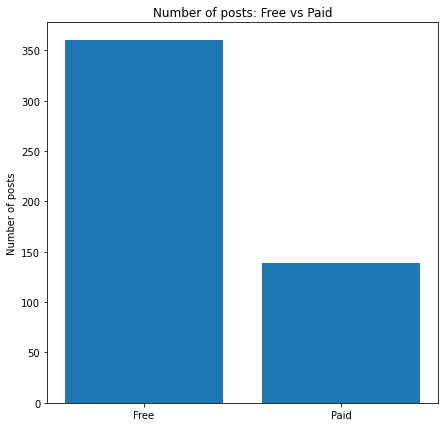

In [22]:
plt.figure(figsize=(7,7))
objects = ('Free','Paid')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df['Paid'].value_counts().values)
plt.xticks(y_pos, objects)
plt.ylabel('Number of posts')
plt.title('Number of posts: Free vs Paid')

### Comments

Text(0.5, 1.0, 'Comments per post distribution')

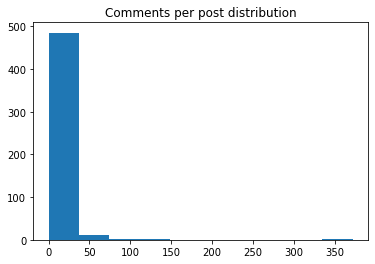

In [23]:
plt.hist(df.iloc[:,len(df.columns)-4])
plt.title("Comments per post distribution")

### Likes

Text(0.5, 1.0, 'Likes per post distribution')

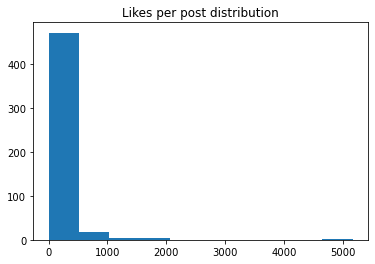

In [24]:
plt.hist(df.iloc[:,len(df.columns)-3])
plt.title("Likes per post distribution")

### Shares

Text(0.5, 1.0, 'Shares per post distribution')

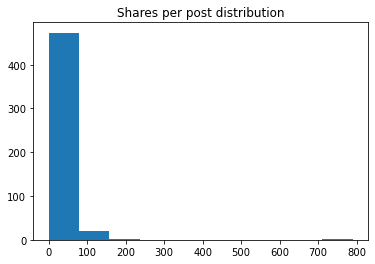

In [25]:
plt.hist(df.iloc[:,len(df.columns)-2])
plt.title("Shares per post distribution")

### Lifetime Data

<Figure size 504x504 with 0 Axes>

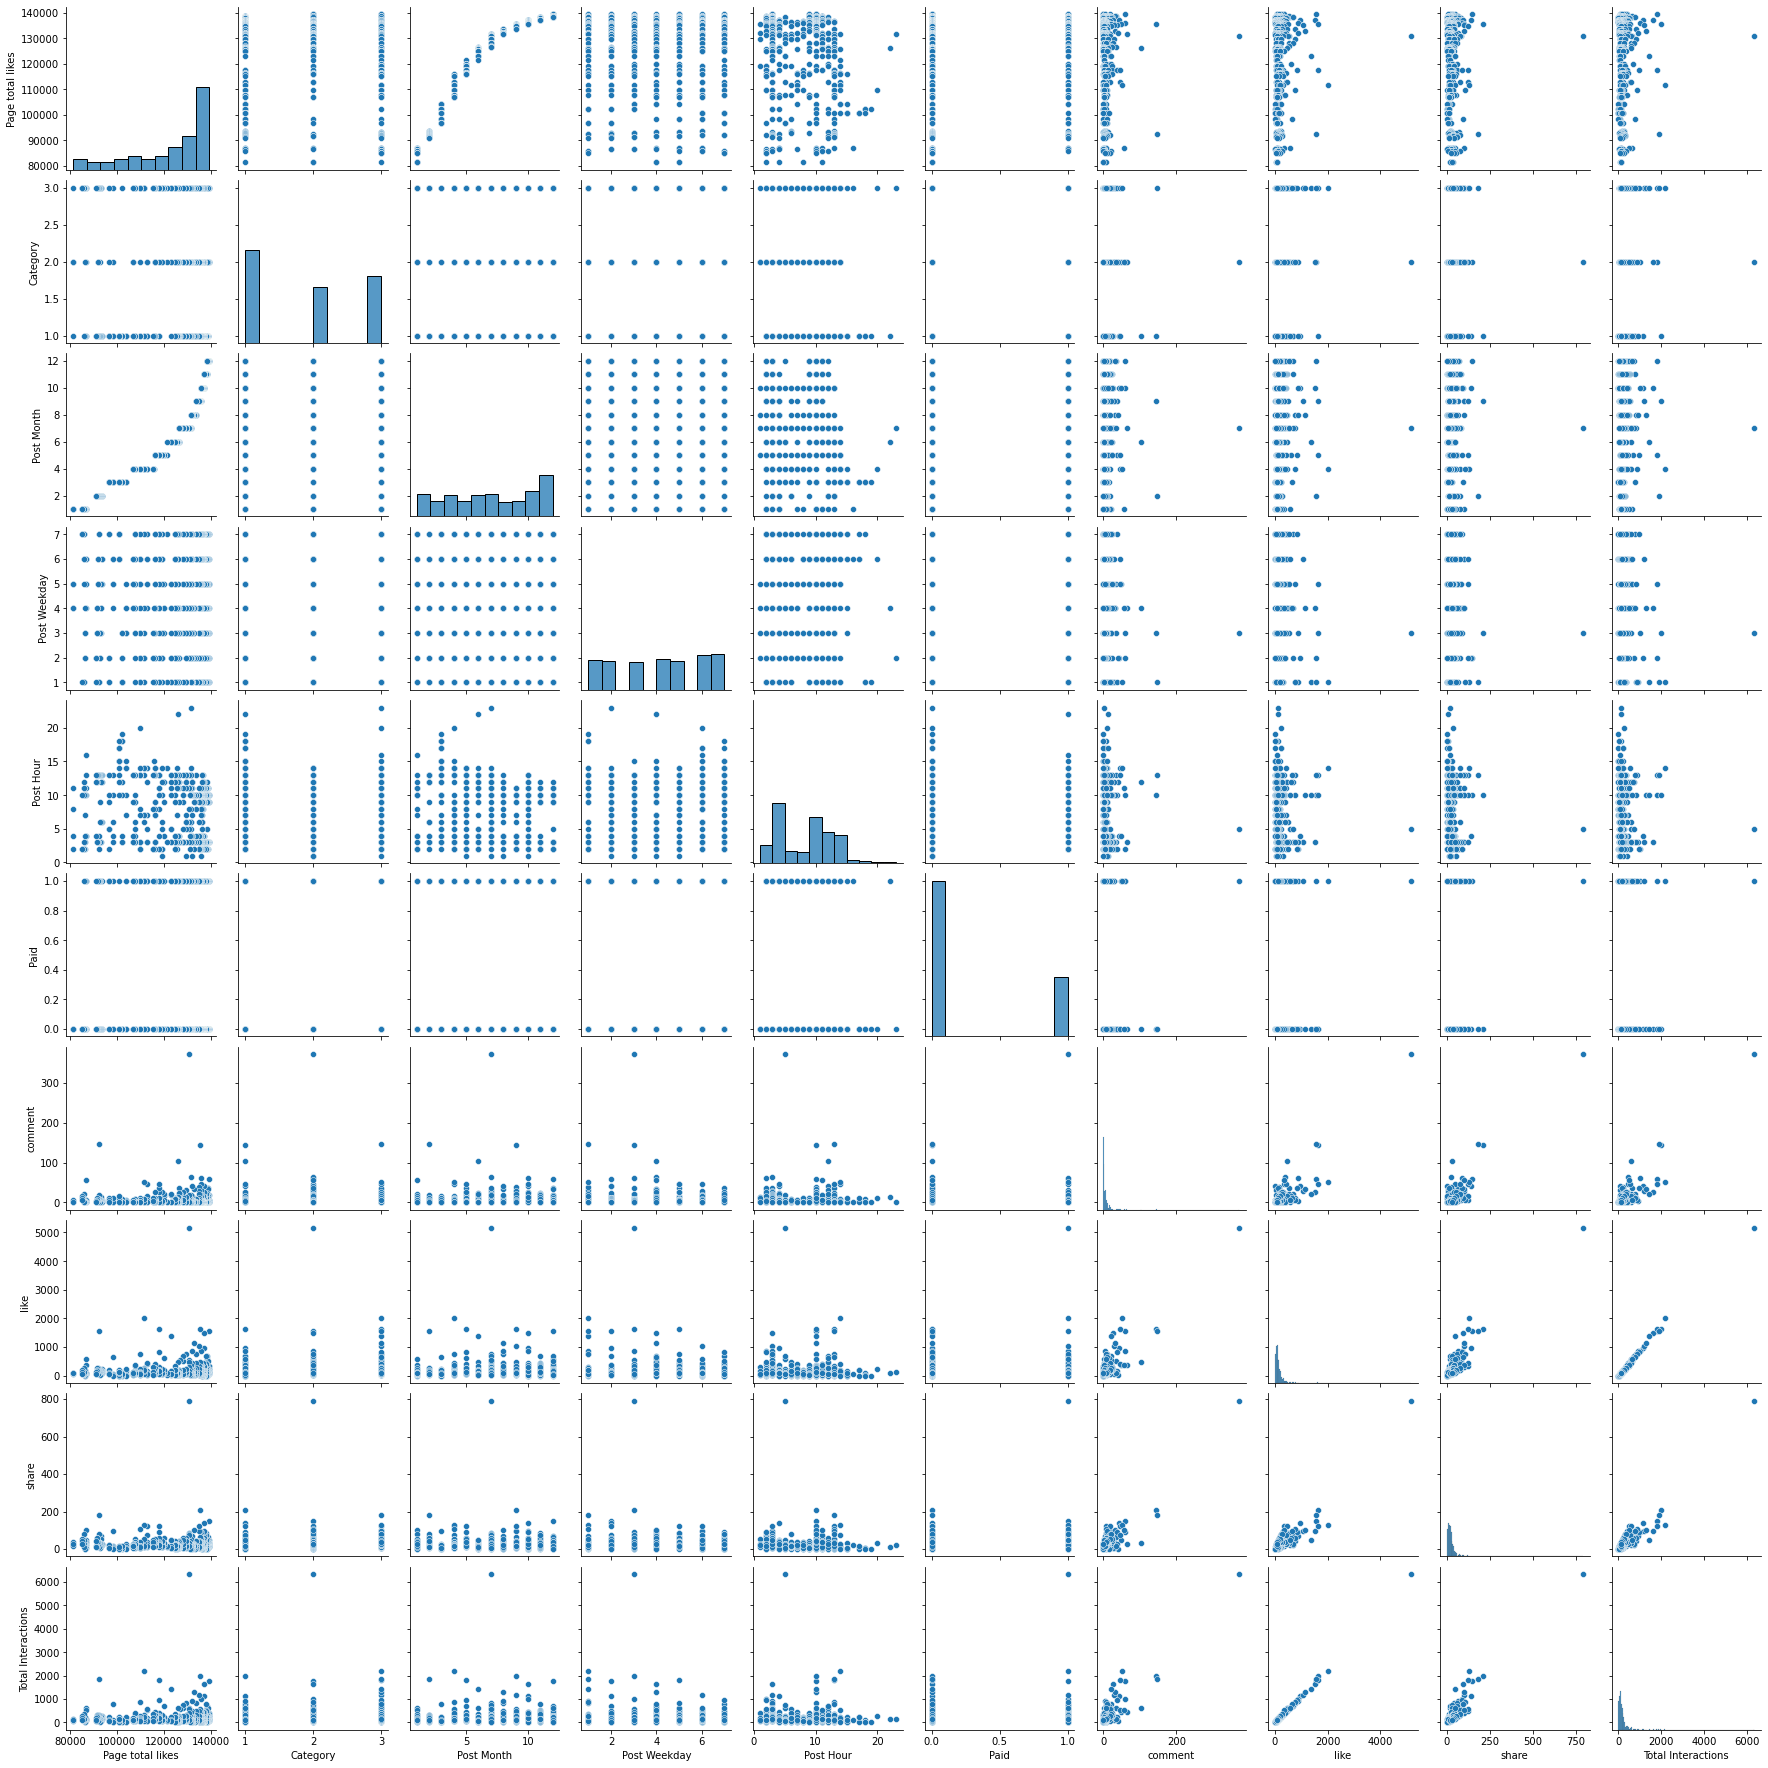

<Figure size 504x504 with 0 Axes>

In [26]:
dfplot = df.drop(df.columns[7:15],axis =1)
sns.pairplot(data=dfplot)
plt.figure(figsize=(7,7))